Twitter Sentiment Analysis 데이터로 type행에 Irrelevant, Neutral, Negative, Positive 레이블이 있고 text열에 tweet 텍스트가 있다.

(데이터 링크: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentimentanalysis/data)

1. Positive, Negative label 데이터를 Lexicon-based Method를 사용하여 평가하기

In [1]:
import pandas as pd
df_training = pd.read_csv('twitter_training.csv')
df_new_t = df_training[~df_training.iloc[:,2].isin(['Neutral', 'Irrelevant'])]

In [2]:
categories_t = df_new_t.iloc[:, 2].tolist()
reviews_t = df_new_t.iloc[:, 3].tolist()
reviews_t = [str(doc) if pd.notna(doc) else '' for doc in reviews_t]
print(set(categories_t))

{'Negative', 'Positive'}


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

english_stops = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

#리뷰 전처리
def preprocess_reviews(reviews):
    processed_reviews = []
    for review in reviews:
        if isinstance(review, str):  # 리뷰가 문자열인지 
            tokens = tokenizer.tokenize(review.lower())
            filtered_words = [word for word in tokens if word not in english_stops]
            processed_reviews.append(' '.join(filtered_words))
        else:
            processed_reviews.append('') 
    return processed_reviews

In [4]:
# 리뷰 전처리 실행
cleaned_reviews_t = preprocess_reviews(reviews_t)
cleaned_reviews_t

['coming borders kill',
 'im getting borderlands kill',
 'im coming borderlands murder',
 'im getting borderlands 2 murder',
 'im getting borderlands murder',
 'spent hours making something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi5wf9jg',
 'spent couple hours something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original picture compared creation made fun pic twitter com mlsi5wf9jg',
 'spent hours something fun know huge borderlands fan maya one favorite characters',
 'spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi5wf9jg',
 '2010 spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi5wf9jg',
 '',


In [5]:
# Afinn
from afinn import Afinn
from sklearn.metrics import accuracy_score

def sentiment_Afinn(docs):
    afn= Afinn(emoticons=True)
    results = []
    
    for doc in docs:
        score = afn.score(doc)
        if score > 0:
            results.append('Positive')
        else:
            results.append('Negative')
    return results

In [6]:
# 감성 분석 실행
sentiment_results_t = sentiment_Afinn(cleaned_reviews_t)

# 결과 출력
for review, sentiment in zip(cleaned_reviews_t, sentiment_results_t):
    print(f'Review: {review} | Sentiment: {sentiment}')

Review: coming borders kill | Sentiment: Negative
Review: im getting borderlands kill | Sentiment: Negative
Review: im coming borderlands murder | Sentiment: Negative
Review: im getting borderlands 2 murder | Sentiment: Negative
Review: im getting borderlands murder | Sentiment: Negative
Review: spent hours making something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi5wf9jg | Sentiment: Positive
Review: spent couple hours something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original picture compared creation made fun pic twitter com mlsi5wf9jg | Sentiment: Positive
Review: spent hours something fun know huge borderlands fan maya one favorite characters | Sentiment: Positive
Review: spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy pic twitte

In [12]:
train_accuracy = accuracy_score(categories_t, sentiment_results_t)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.714246190026053


**validation 데이터에 적용**

In [13]:
import pandas as pd
df_validation = pd.read_csv('twitter_validation.csv')
df_new_v = df_validation[~df_validation.iloc[:,2].isin(['Neutral', 'Irrelevant'])]

categories_v = df_new_v.iloc[:, 2].tolist()
reviews_v = df_new_v.iloc[:, 3].tolist()
reviews_v = [str(doc) if pd.notna(doc) else '' for doc in reviews_v]
print(set(categories_v))

{'Positive', 'Negative'}


In [14]:
#전처리
cleaned_reviews_v = preprocess_reviews(reviews_v)
cleaned_reviews_v

['microsoft pay word functions poorly samsungus chromebook',
 'csgo matchmaking full closet hacking truly awful game',
 'hi eahelp madeleine mccann cellar past 13 years little sneaky thing escaped whilst loading fifa points took card use paypal account working help resolve please',
 'thank eamaddennfl new te austin hooper orange brown browns austinhooper18 pic twitter com grg4xzfkon',
 'rocket league sea thieves rainbow six siege love playing three stream best stream twitch rocketleague seaofthieves rainbowsixsiege follow',
 'ass still knee deep assassins creed odyssey way anytime soon lmao',
 'fix jesus please fix world going playstation askplaystation playstationsup treyarch callofduty negative 345 silver wolf error code pic twitter com ziryhrf59q',
 'professional dota 2 scene fucking exploding completely welcome get garbage',
 'itching assassinate tccgif assassinscreedblackflag assassinscreed thecapturedcollective pic twitter com vv8mogtcjw',
 'fredtjoseph hey fred comcast cut cable

In [15]:
# 감성 분석
sentiment_results_v = sentiment_Afinn(cleaned_reviews_v)

# 결과 출력
for review, sentiment in zip(cleaned_reviews_v, sentiment_results_v):
    print(f'Review: {review} | Sentiment: {sentiment}')

Review: microsoft pay word functions poorly samsungus chromebook | Sentiment: Negative
Review: csgo matchmaking full closet hacking truly awful game | Sentiment: Negative
Review: hi eahelp madeleine mccann cellar past 13 years little sneaky thing escaped whilst loading fifa points took card use paypal account working help resolve please | Sentiment: Positive
Review: thank eamaddennfl new te austin hooper orange brown browns austinhooper18 pic twitter com grg4xzfkon | Sentiment: Positive
Review: rocket league sea thieves rainbow six siege love playing three stream best stream twitch rocketleague seaofthieves rainbowsixsiege follow | Sentiment: Positive
Review: ass still knee deep assassins creed odyssey way anytime soon lmao | Sentiment: Negative
Review: fix jesus please fix world going playstation askplaystation playstationsup treyarch callofduty negative 345 silver wolf error code pic twitter com ziryhrf59q | Sentiment: Negative
Review: professional dota 2 scene fucking exploding comp

In [16]:
val_accuracy = accuracy_score(categories_v, sentiment_results_v)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7200736648250461


Training Accuracy: 0.714246190026053이고 Validation Accuracy: 0.7200736648250461을 보인다.

Training Accuracy와 Validation Accuracy가 비슷한 수준이므로 과적합의 위험이 낮고, 모델이 일반화되어 검증 데이터에서도 비슷한 성능을 보인다.


**F1-score**

In [17]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# F1-score 
train_f1 = f1_score(categories_t, sentiment_results_t, average='weighted')
val_f1 = f1_score(categories_v, sentiment_results_v, average='weighted')

print(f'Training F1 Score: {train_f1}')
print(f'Validation F1 Score: {val_f1}')

Training F1 Score: 0.7118932017926305
Validation F1 Score: 0.7193299083895105


**Confusion Matrix**

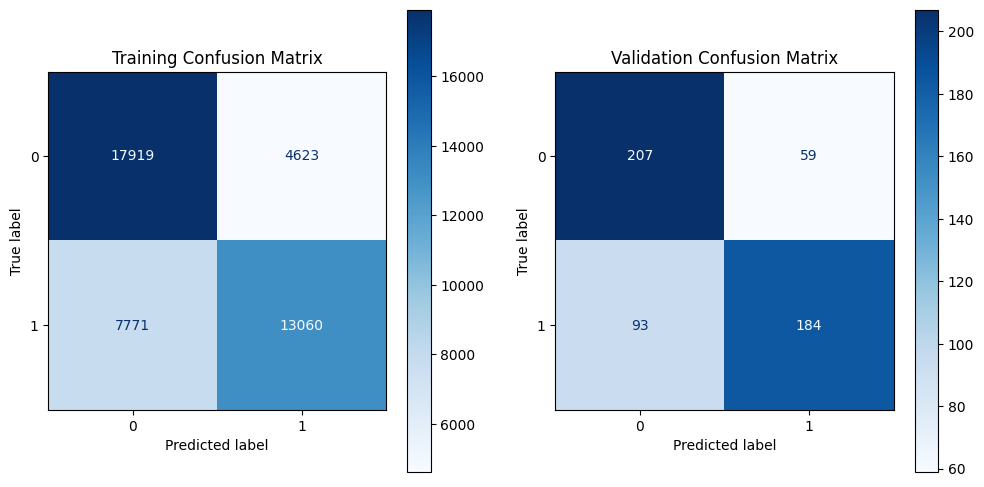

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training 데이터 Confusion Matrix
cm_train = confusion_matrix(categories_t, sentiment_results_t)
ConfusionMatrixDisplay(cm_train).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Training Confusion Matrix')

# Validation 데이터 Confusion Matrix
cm_val = confusion_matrix(categories_v, sentiment_results_v)
ConfusionMatrixDisplay(cm_val).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Validation Confusion Matrix')

plt.show()
